In [1]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
from warnings import filterwarnings
filterwarnings('ignore')
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
data = xr.open_mfdataset('precip_combined.nc')
botswana = data.where(data != -99.0)

In [3]:
botswana_data = botswana.precip
botswana_data

<xarray.DataArray 'precip' (datetime: 3652, lat: 38, lon: 40)>
dask.array<where, shape=(3652, 38, 40), dtype=float32, chunksize=(3652, 38, 40), chunktype=numpy.ndarray>
Coordinates:
  * lon       (lon) float32 19.75 20.0 20.25 20.5 ... 28.75 29.0 29.25 29.5
  * lat       (lat) float32 -17.5 -17.75 -18.0 -18.25 ... -26.25 -26.5 -26.75
  * datetime  (datetime) datetime64[ns] 2001-01-01 2001-01-02 ... 2010-12-31
Attributes:
    grid_mapping:  crs

In [4]:
monthly_data = botswana_data.groupby('datetime.month')
yearly_data = botswana_data.groupby('datetime.year')

In [5]:
# monthly rainfall totals
mon_rainfall_totals = monthly_data.sum('datetime')

# monthly climatologies rainfall totals
mon_mean_climo_totals = monthly_data.sum('datetime').mean('month')

In [6]:
# annual totals
annual_totals = yearly_data.sum()

# annual climatology totals
annual_climo_totals = yearly_data.sum('datetime').mean('year')

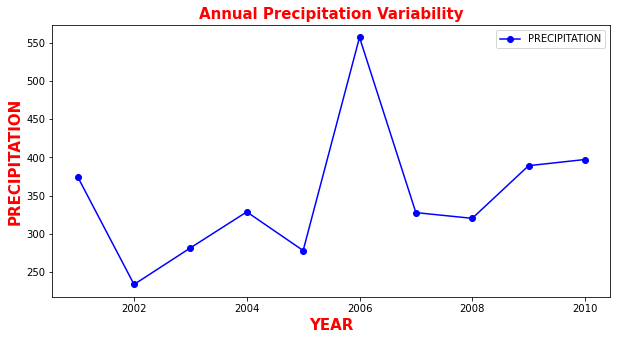

In [7]:
#plotting time series
fig,ax = plt.subplots(figsize = (10,5))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(annual_totals.year,annual_totals.mean(['lon','lat']),color = 'blue', lw = 1.5 ,label= 'PRECIPITATION',marker='o')
ax.set_title('Annual Precipitation Variability', fontweight = 'bold', fontsize=15 ,color = 'red')
ax.set_xlabel("YEAR", fontweight = 'bold',fontsize = 15, color= 'red')
ax.set_ylabel('PRECIPITATION', fontweight = 'bold', fontsize = 15, color= 'red')
plt.legend()
plt.show()

In [8]:
#DRY days per year
dryDays_per_year = botswana_data.where(botswana_data < 1).groupby('datetime.year').count('datetime')

#WET days per year
wetDays_per_year = botswana_data.where(botswana_data >= 1).groupby('datetime.year').count('datetime')

#DRY days per MONTH
dryDays_per_month = botswana_data.where(botswana_data < 1).groupby('datetime.month').count('datetime')

#WET days per MONTH
wetDays_per_month = botswana_data.where(botswana_data >= 1).groupby('datetime.month').count('datetime')

# Extreme Rainfall >10mm per year
Xrain10 =botswana_data.where(botswana_data > 10).groupby('datetime.year').count('datetime')

# Extreme Rainfall >20mm per year
Xrain20 = botswana_data.where(botswana_data > 20).groupby('datetime.year').count('datetime')

# Extreme Rainfall >10mm per month
Xrain10M = botswana_data.where(botswana_data > 10).groupby('datetime.month').count('datetime')

# Extreme Rainfall >10mm per month
Xrain20M = botswana_data.where(botswana_data > 20).groupby('datetime.month').count('datetime')


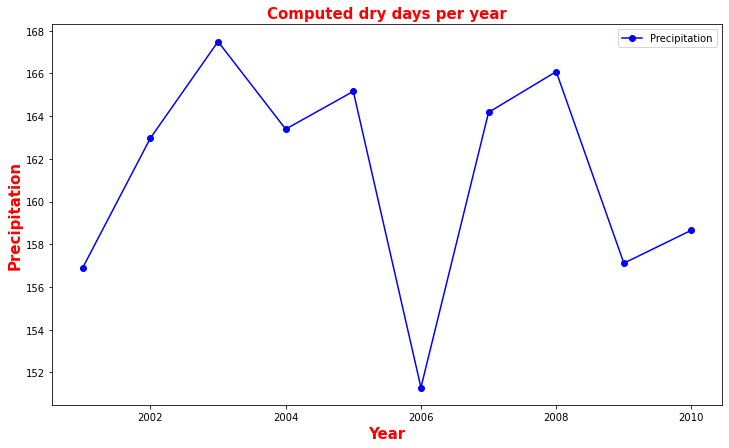

In [9]:
#plotting time series for drydays per year
fig,ax = plt.subplots(figsize = (12,7))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(annual_totals.year,dryDays_per_year.mean(['lon','lat']),color = 'blue', lw = 1.5 ,label= 'Precipitation',marker='o')
ax.set_title('Computed dry days per year', fontweight = 'bold', fontsize=15 ,color = 'red')
ax.set_xlabel("Year", fontweight = 'bold',fontsize = 15, color= 'red')
ax.set_ylabel('Precipitation', fontweight = 'bold', fontsize = 15, color= 'red')
plt.legend()
plt.show()

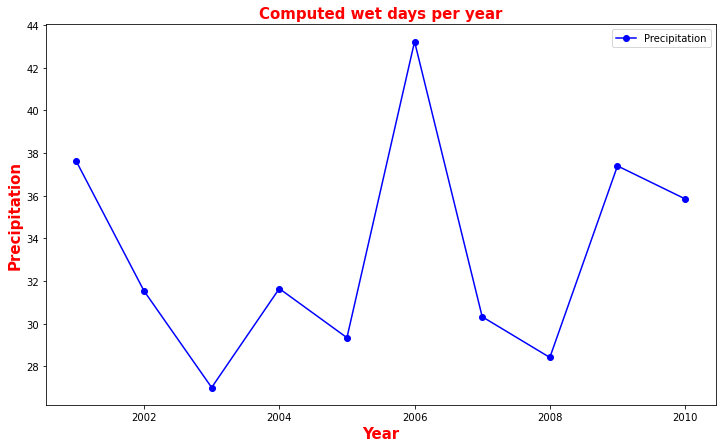

In [10]:
#plotting time series for wetdays per year
fig,ax = plt.subplots(figsize = (12,7))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(annual_totals.year,wetDays_per_year.mean(['lon','lat']),color = 'blue', lw = 1.5 ,label= 'Precipitation',marker='o')
ax.set_title('Computed wet days per year', fontweight = 'bold', fontsize=15 ,color = 'red')
ax.set_xlabel("Year", fontweight = 'bold',fontsize = 15, color= 'red')
ax.set_ylabel('Precipitation', fontweight = 'bold', fontsize = 15, color= 'red')
plt.legend()
plt.show()


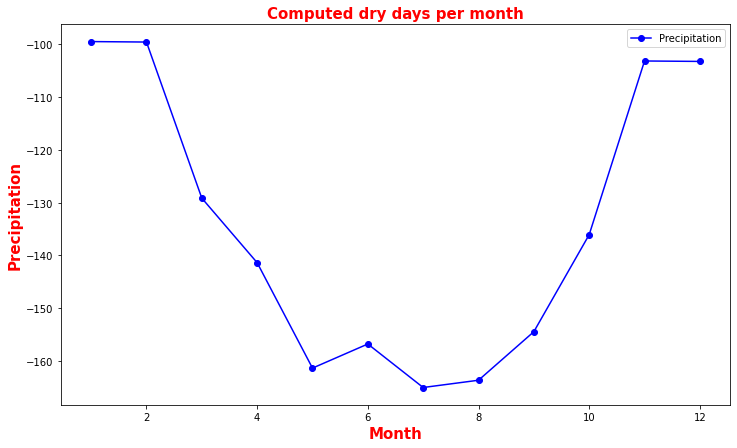

In [11]:
fig,ax = plt.subplots(figsize = (12,7))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(mon_rainfall_totals.month,dryDays_per_month.mean(['lon','lat'])*-1,color = 'blue', lw = 1.5 ,label= 'Precipitation',marker='o')
ax.set_title('Computed dry days per month', fontweight = 'bold', fontsize=15 ,color = 'red')
ax.set_xlabel("Month", fontweight = 'bold',fontsize = 15, color= 'red')
ax.set_ylabel('Precipitation', fontweight = 'bold', fontsize = 15, color= 'red')
plt.legend()
plt.show()

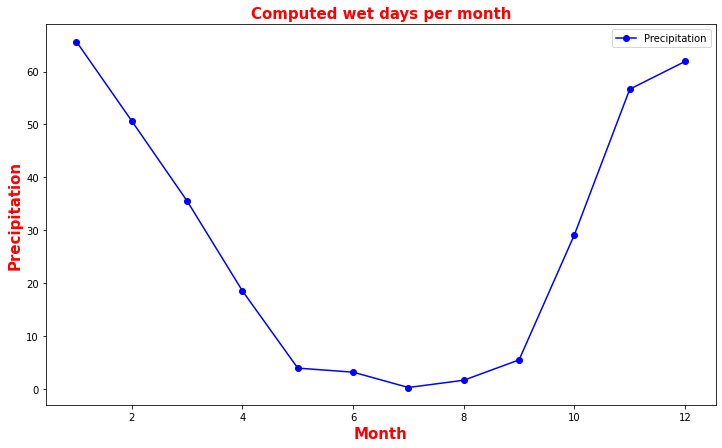

In [12]:
fig,ax = plt.subplots(figsize = (12,7))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(mon_rainfall_totals.month,wetDays_per_month.mean(['lon','lat']),color = 'blue', lw = 1.5 ,label= 'Precipitation',marker='o')
ax.set_title('Computed wet days per month', fontweight = 'bold', fontsize=15 ,color = 'red')
ax.set_xlabel("Month", fontweight = 'bold',fontsize = 15, color= 'red')
ax.set_ylabel('Precipitation', fontweight = 'bold', fontsize = 15, color= 'red')
plt.legend()
plt.show()

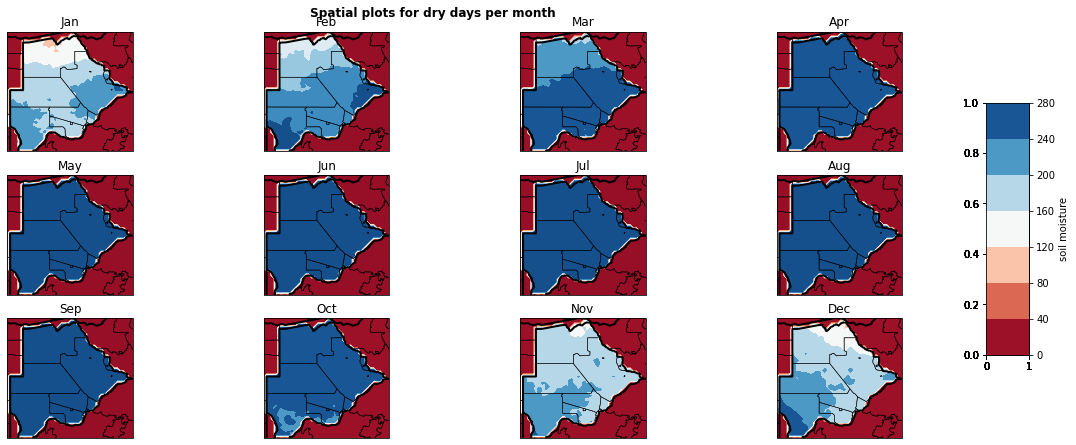

In [13]:
# spatial plots for dry days per month
fig,ax=plt.subplots(3,4,figsize=(24,7), 
                    subplot_kw={'projection': ccrs.PlateCarree()},squeeze=0.1)
ax=ax.flatten()
month_names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
#     ax[i].add_feature(cfeature.OCEAN)
#     ax[i].add_feature(cfeature.LAKES, color='blue')
#     ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([19.75,29.5,-17.5,-26.75])
    
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(dryDays_per_month.lon, dryDays_per_month.lat, dryDays_per_month[i],
                       cmap='RdBu', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='soil moisture')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('Spatial plots for dry days per month', fontweight='bold');
# plt.savefig('done.png');

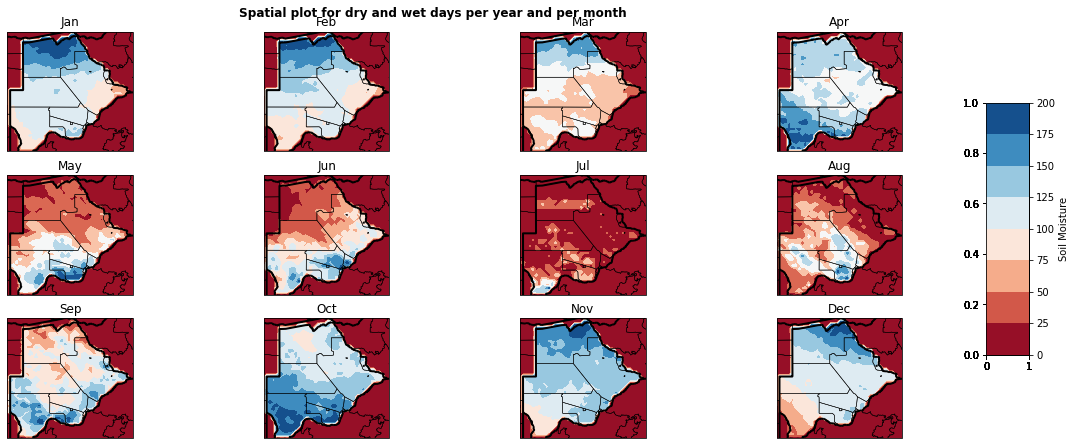

In [14]:
# spatial plots for dry and wet days per year and per month
fig,ax=plt.subplots(3,4,figsize=(24,7), 
                    subplot_kw={'projection': ccrs.PlateCarree()},squeeze=0.1)
ax=ax.flatten()
month_names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
#     ax[i].add_feature(cfeature.OCEAN)
#     ax[i].add_feature(cfeature.LAKES, color='blue')
#     ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([19.75,29.5,-17.5,-26.75])
    
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(wetDays_per_month.lon, wetDays_per_month.lat, wetDays_per_month[i],
                       cmap='RdBu', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Soil Moisture')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('Spatial plot for dry and wet days per year and per month', fontweight='bold');
# plt.savefig('done.png');


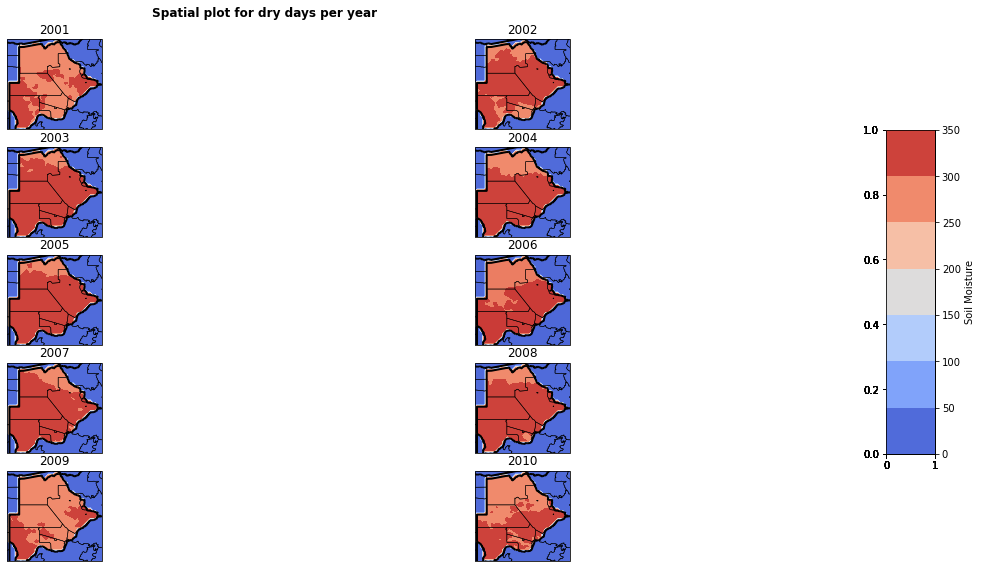

In [15]:
# spatial plots for dry days per year
fig,ax=plt.subplots(5,2,figsize=(27,9), 
                    subplot_kw={'projection': ccrs.PlateCarree()})
ax=ax.flatten()
month_names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct']
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
#     ax[i].add_feature(cfeature.OCEAN)
#     ax[i].add_feature(cfeature.LAKES, color='blue')
#     ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([19.75,29.5,-17.5,-26.75])
    ax[i].set_title(annual_totals.year.data[i])
    cb= ax[i].contourf(dryDays_per_year.lon, dryDays_per_year.lat, dryDays_per_year[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Soil Moisture')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('Spatial plot for dry days per year', fontweight='bold');
# plt.savefig('done.png');

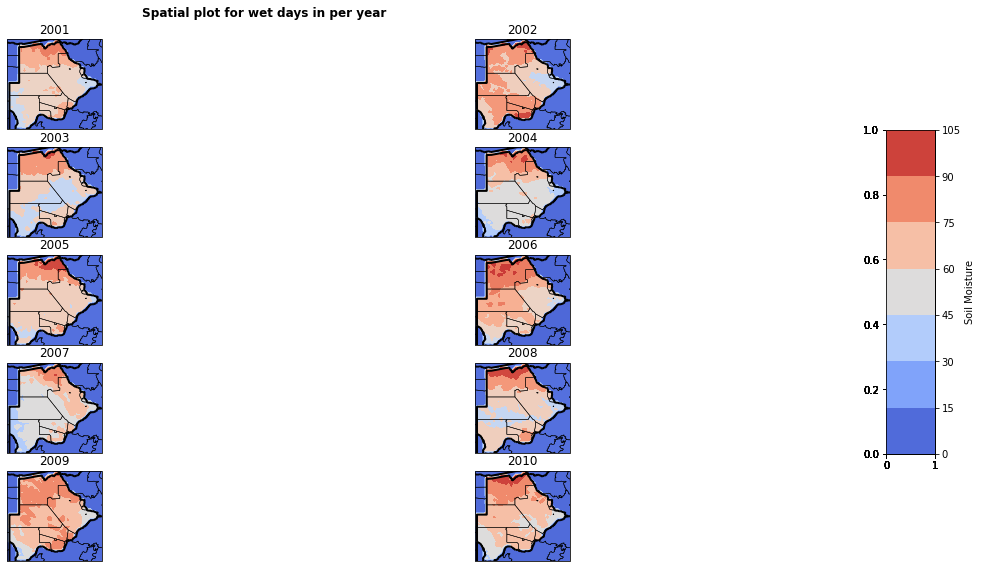

In [16]:
# spatial plots for wet days per year
fig,ax=plt.subplots(5,2,figsize=(27,9), 
                    subplot_kw={'projection': ccrs.PlateCarree()})
ax=ax.flatten()
month_names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct']
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
#     ax[i].add_feature(cfeature.OCEAN)
#     ax[i].add_feature(cfeature.LAKES, color='blue')
#     ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([19.75,29.5,-17.5,-26.75])
    ax[i].set_title(annual_totals.year.data[i])
    cb= ax[i].contourf(wetDays_per_year.lon, wetDays_per_year.lat, wetDays_per_year[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Soil Moisture')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('Spatial plot for wet days in per year', fontweight='bold');
# plt.savefig('done.png');

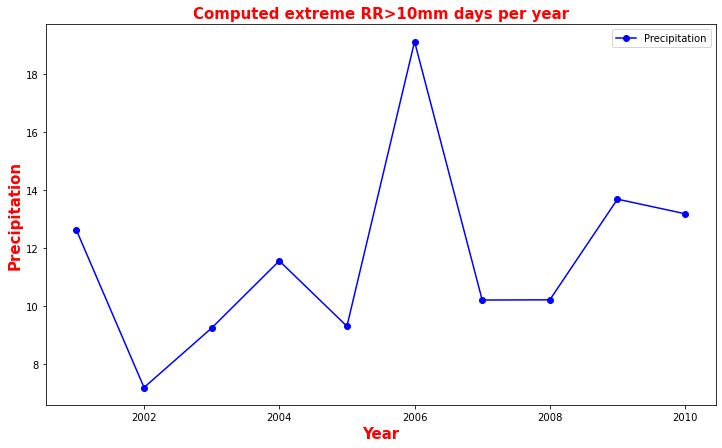

In [17]:
#plotting time series for extreme RR>10mm per year
fig,ax = plt.subplots(figsize = (12,7))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(Xrain10.year,Xrain10.mean(['lon','lat']),color = 'blue', lw = 1.5 ,label= 'Precipitation',marker='o')
ax.set_title('Computed extreme RR>10mm days per year', fontweight = 'bold', fontsize=15 ,color = 'red')
ax.set_xlabel("Year", fontweight = 'bold',fontsize = 15, color= 'red')
ax.set_ylabel('Precipitation', fontweight = 'bold', fontsize = 15, color= 'red')
plt.legend()
plt.show()

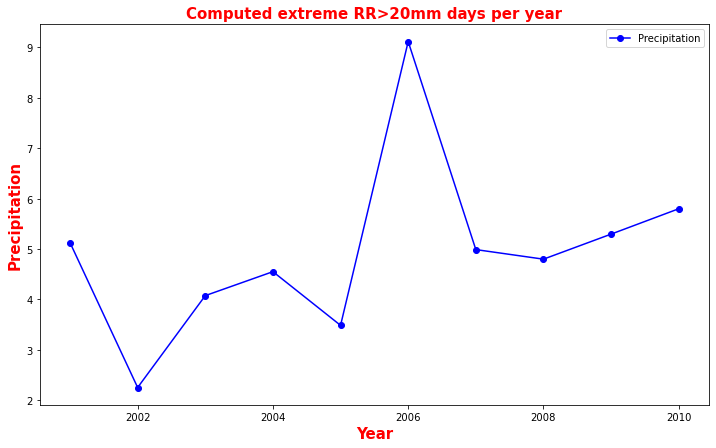

In [18]:
#plotting time series for extreme RR>20mm per year
fig,ax = plt.subplots(figsize = (12,7))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(Xrain20.year,Xrain20.mean(['lon','lat']),color = 'blue', lw = 1.5 ,label= 'Precipitation',marker='o')
ax.set_title('Computed extreme RR>20mm days per year', fontweight = 'bold', fontsize=15 ,color = 'red')
ax.set_xlabel("Year", fontweight = 'bold',fontsize = 15, color= 'red')
ax.set_ylabel('Precipitation', fontweight = 'bold', fontsize = 15, color= 'red')
plt.legend()
plt.show()

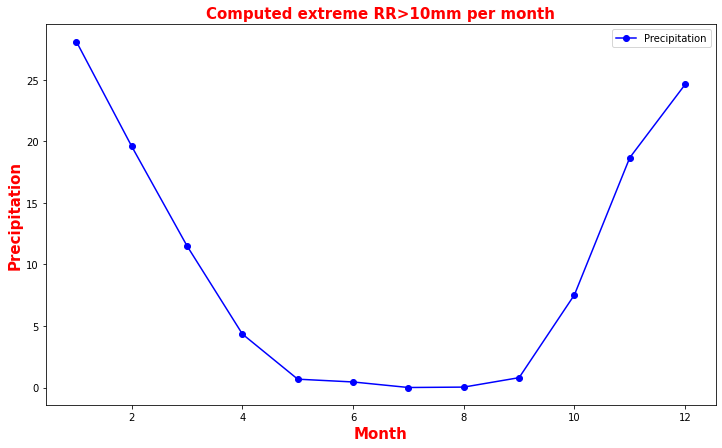

In [19]:
fig,ax = plt.subplots(figsize = (12,7))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(Xrain10M.month,Xrain10M.mean(['lon','lat']),color = 'blue', lw = 1.5 ,label= 'Precipitation',marker='o')
ax.set_title('Computed extreme RR>10mm per month', fontweight = 'bold', fontsize=15 ,color = 'red')
ax.set_xlabel("Month", fontweight = 'bold',fontsize = 15, color= 'red')
ax.set_ylabel('Precipitation', fontweight = 'bold', fontsize = 15, color= 'red')
plt.legend()
plt.show()


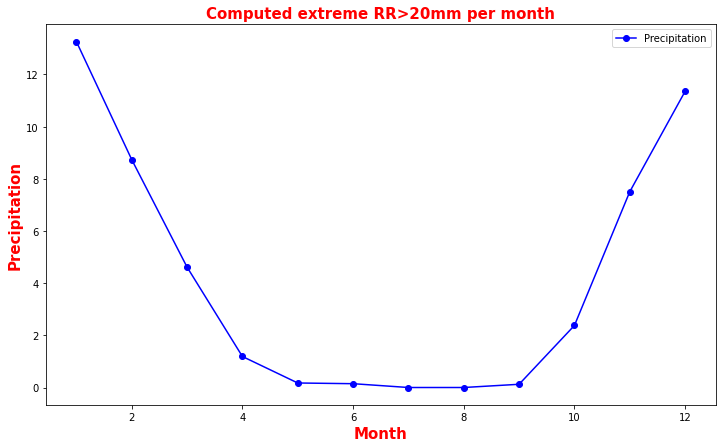

In [20]:
fig,ax = plt.subplots(figsize = (12,7))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(Xrain20M.month,Xrain20M.mean(['lon','lat']),color = 'blue', lw = 1.5 ,label= 'Precipitation',marker='o')
ax.set_title('Computed extreme RR>20mm per month', fontweight = 'bold', fontsize=15 ,color = 'red')
ax.set_xlabel("Month", fontweight = 'bold',fontsize = 15, color= 'red')
ax.set_ylabel('Precipitation', fontweight = 'bold', fontsize = 15, color= 'red')
plt.legend()
plt.show()


In [21]:
Xrain20.shape

(10, 38, 40)

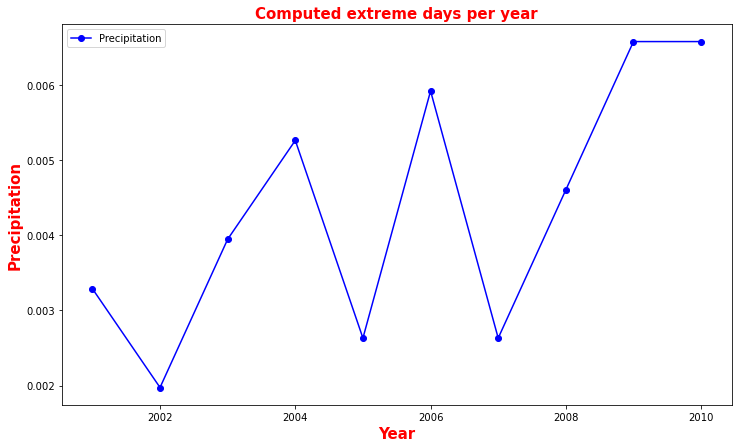

In [22]:
Xr = botswana_data.mean(['lon','lat']).where(botswana_data == 20).groupby('datetime.year').count('datetime')
#plotting time series for dry days per year
fig,ax = plt.subplots(figsize = (12,7))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(Xr.year,Xr.mean(['lon','lat']),color = 'blue', lw = 1.5 ,label= 'Precipitation',marker='o')
ax.set_title('Computed extreme days per year', fontweight = 'bold', fontsize=15 ,color = 'red')
ax.set_xlabel("Year", fontweight = 'bold',fontsize = 15, color= 'red')
ax.set_ylabel('Precipitation', fontweight = 'bold', fontsize = 15, color= 'red')
plt.legend()
plt.show()

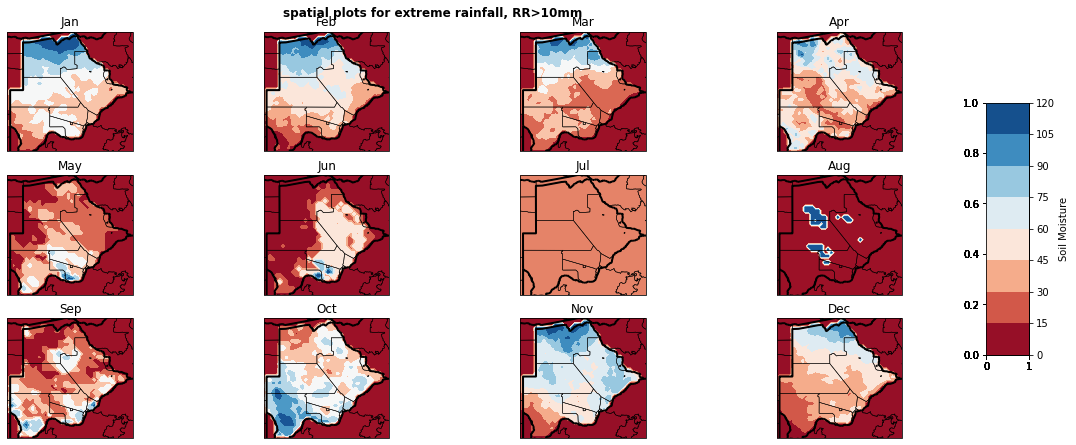

In [23]:
# spatial plots for extreme rainfall 
fig,ax=plt.subplots(3,4,figsize=(24,7), 
                    subplot_kw={'projection': ccrs.PlateCarree()},squeeze=0.1)
ax=ax.flatten()
month_names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
#     ax[i].add_feature(cfeature.OCEAN)
#     ax[i].add_feature(cfeature.LAKES, color='blue')
#     ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([19.75,29.5,-17.5,-26.75])
    
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(Xrain10M.lon, Xrain10M.lat, Xrain10M[i],
                       cmap='RdBu', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Soil Moisture')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('spatial plots for extreme rainfall, RR>10mm', fontweight='bold');
# plt.savefig('done.png');

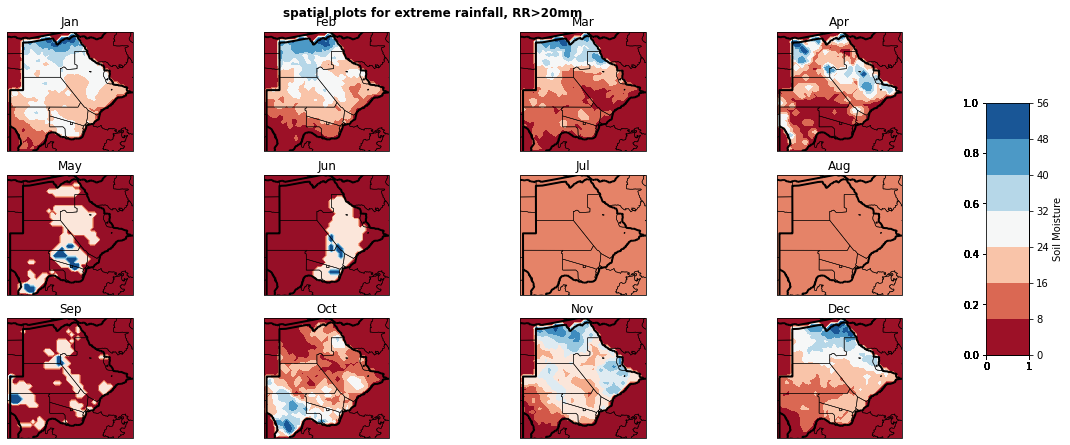

In [24]:
# spatial plots for extreme rainfall 
fig,ax=plt.subplots(3,4,figsize=(24,7), 
                    subplot_kw={'projection': ccrs.PlateCarree()},squeeze=0.1)
ax=ax.flatten()
month_names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
#     ax[i].add_feature(cfeature.OCEAN)
#     ax[i].add_feature(cfeature.LAKES, color='blue')
#     ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([19.75,29.5,-17.5,-26.75])
    
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(Xrain20M.lon, Xrain20M.lat, Xrain20M[i],
                       cmap='RdBu', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Soil Moisture')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('spatial plots for extreme rainfall, RR>20mm', fontweight='bold');
# plt.savefig('done.png');

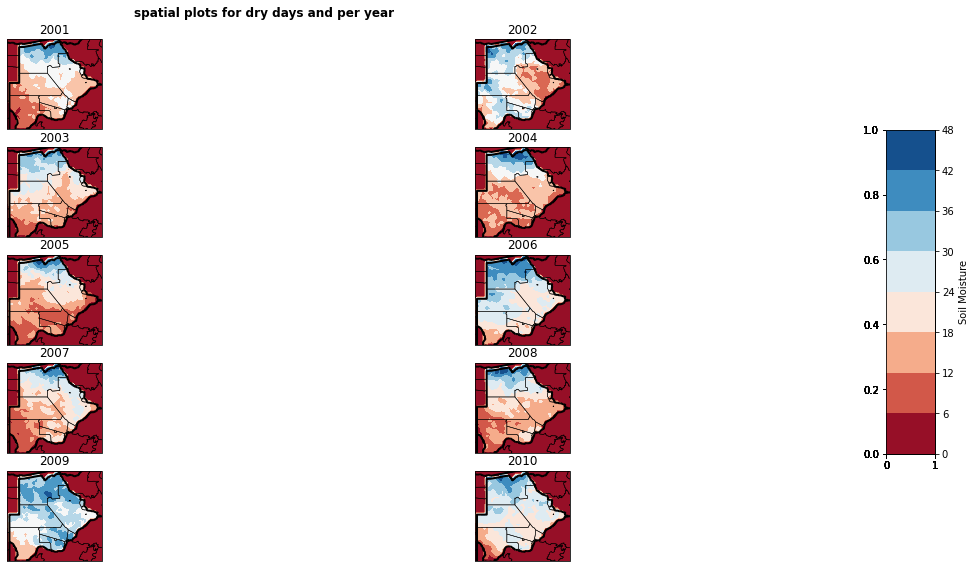

In [25]:
# spatial plots for dry days per year
fig,ax=plt.subplots(5,2,figsize=(27,9), 
                    subplot_kw={'projection': ccrs.PlateCarree()})
ax=ax.flatten()
month_names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct']
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
#     ax[i].add_feature(cfeature.OCEAN)
#     ax[i].add_feature(cfeature.LAKES, color='blue')
#     ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([19.75,29.5,-17.5,-26.75])
    ax[i].set_title(annual_totals.year.data[i])
    cb= ax[i].contourf(Xrain10.lon, Xrain10.lat, Xrain10[i],
                       cmap='RdBu', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Soil Moisture')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('spatial plots for dry days and per year', fontweight='bold');
# plt.savefig('done.png');


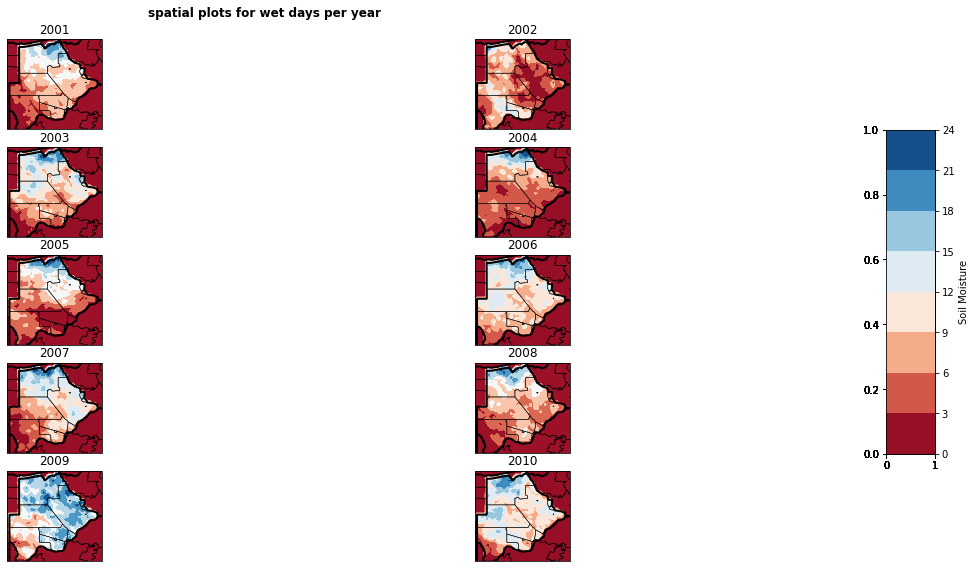

In [26]:
# spatial plots for wet days per year
fig,ax=plt.subplots(5,2,figsize=(27,9), 
                    subplot_kw={'projection': ccrs.PlateCarree()})
ax=ax.flatten()
month_names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct']
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
#     ax[i].add_feature(cfeature.OCEAN)
#     ax[i].add_feature(cfeature.LAKES, color='blue')
#     ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([19.75,29.5,-17.5,-26.75])
    ax[i].set_title(annual_totals.year.data[i])
    cb= ax[i].contourf(Xrain20.lon, Xrain20.lat, Xrain20[i],
                       cmap='RdBu', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Soil Moisture')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('spatial plots for wet days per year', fontweight='bold');
# plt.savefig('done.png');